 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv')

In [3]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)

whale_returns.count()

Date                           1059
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [5]:
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
whale_returns.head(30)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147
8,2015-03-12,0.008265,0.010272,0.013117,0.010801
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142
10,2015-03-16,0.007901,0.003583,0.007953,0.008055


In [7]:
whale_returns.sort_index(ascending=False, inplace = True)

In [8]:
whale_returns = whale_returns.loc[1052:,]

In [9]:
whale_returns.head(10)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1052,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088
1051,2019-04-18,0.001448,0.001222,0.000582,0.001916
1050,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222
1049,2019-04-16,0.002699,0.000388,-0.000831,0.000837
1048,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492
1047,2019-04-12,0.005663,-0.001165,0.004217,0.007316
1046,2019-04-11,0.003406,-0.003959,-0.000637,-0.000496
1045,2019-04-10,0.009808,0.008366,0.002912,0.005269
1044,2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497
1043,2019-04-08,0.000483,-0.000310,0.000153,0.000841


In [10]:
whale_returns.reset_index(inplace = True)

whale_returns.head(10)

,index,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,1052,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088
1,1051,2019-04-18,0.001448,0.001222,0.000582,0.001916
2,1050,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222
3,1049,2019-04-16,0.002699,0.000388,-0.000831,0.000837
4,1048,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492
5,1047,2019-04-12,0.005663,-0.001165,0.004217,0.007316
6,1046,2019-04-11,0.003406,-0.003959,-0.000637,-0.000496
7,1045,2019-04-10,0.009808,0.008366,0.002912,0.005269
8,1044,2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497
9,1043,2019-04-08,0.000483,-0.000310,0.000153,0.000841


In [11]:
whale_returns = whale_returns.drop(columns = 'index')

whale_returns.head(10)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088
1,2019-04-18,0.001448,0.001222,0.000582,0.001916
2,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222
3,2019-04-16,0.002699,0.000388,-0.000831,0.000837
4,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492
5,2019-04-12,0.005663,-0.001165,0.004217,0.007316
6,2019-04-11,0.003406,-0.003959,-0.000637,-0.000496
7,2019-04-10,0.009808,0.008366,0.002912,0.005269
8,2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497
9,2019-04-08,0.000483,-0.000310,0.000153,0.000841


In [12]:
whale_returns = whale_returns.drop(columns = 'Date')

whale_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,-0.002586,-0.007333,-0.003640,-0.001088
1,0.001448,0.001222,0.000582,0.001916
2,-0.002897,-0.006467,-0.004409,0.003222
3,0.002699,0.000388,-0.000831,0.000837
4,-0.001422,-0.001156,0.000398,-0.010492
5,0.005663,-0.001165,0.004217,0.007316
6,0.003406,-0.003959,-0.000637,-0.000496
7,0.009808,0.008366,0.002912,0.005269
8,-0.005657,-0.004396,-0.006536,-0.002497
9,0.000483,-0.000310,0.000153,0.000841


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [13]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv')

In [14]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [15]:
# Drop nulls
algo_returns.dropna(inplace=True)

In [16]:
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [17]:
algo_returns.sort_index(ascending=False, inplace=True)

algo_returns.head(30)

,Date,Algo 1,Algo 2
1240,2019-05-01,0.000094,-0.007358
1239,2019-04-30,-0.002944,-0.001570
1238,2019-04-29,0.005208,0.002829
1237,2019-04-26,0.002981,0.005256
1236,2019-04-25,0.000682,-0.007247
1235,2019-04-24,0.001095,0.000399
1234,2019-04-23,0.004969,0.009622
1233,2019-04-22,0.000677,-0.001936
1232,2019-04-18,-0.000588,-0.001229
1231,2019-04-17,-0.010301,-0.005228


In [18]:
algo_returns = algo_returns.loc[1233:,]

algo_returns.head(25)

,Date,Algo 1,Algo 2
1233,2019-04-22,0.000677,-0.001936
1232,2019-04-18,-0.000588,-0.001229
1231,2019-04-17,-0.010301,-0.005228
1230,2019-04-16,-0.006945,0.002899
1229,2019-04-15,-0.004331,-0.004572
1228,2019-04-12,-0.005501,0.004504
1227,2019-04-11,0.001705,-0.001568
1226,2019-04-10,-0.004221,0.009632
1225,2019-04-09,0.012012,-0.011639
1224,2019-04-08,0.003761,0.000218


In [19]:
algo_returns.reset_index(inplace=True)


algo_returns.head(15)

,index,Date,Algo 1,Algo 2
0,1233,2019-04-22,0.000677,-0.001936
1,1232,2019-04-18,-0.000588,-0.001229
2,1231,2019-04-17,-0.010301,-0.005228
3,1230,2019-04-16,-0.006945,0.002899
4,1229,2019-04-15,-0.004331,-0.004572
5,1228,2019-04-12,-0.005501,0.004504
6,1227,2019-04-11,0.001705,-0.001568
7,1226,2019-04-10,-0.004221,0.009632
8,1225,2019-04-09,0.012012,-0.011639
9,1224,2019-04-08,0.003761,0.000218


In [20]:
algo_returns = algo_returns[['Algo 1', 'Algo 2']]

algo_returns.head(15)

,Algo 1,Algo 2
0,0.000677,-0.001936
1,-0.000588,-0.001229
2,-0.010301,-0.005228
3,-0.006945,0.002899
4,-0.004331,-0.004572
5,-0.005501,0.004504
6,0.001705,-0.001568
7,-0.004221,0.009632
8,0.012012,-0.011639
9,0.003761,0.000218


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [21]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv('sp500_history.csv')

In [22]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [23]:
# Fix Data Types
sp500_history['Date'] = pd.to_datetime(sp500_history['Date'])

sp500_history.head(10)

,Date,Close
0,2019-04-23,$2933.68
1,2019-04-22,$2907.97
2,2019-04-18,$2905.03
3,2019-04-17,$2900.45
4,2019-04-16,$2907.06
5,2019-04-15,$2905.58
6,2019-04-12,$2907.41
7,2019-04-11,$2888.32
8,2019-04-10,$2888.21
9,2019-04-09,$2878.20


In [24]:
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')

sp500_history.head(10)

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06
5,2019-04-15,2905.58
6,2019-04-12,2907.41
7,2019-04-11,2888.32
8,2019-04-10,2888.21
9,2019-04-09,2878.20


In [25]:
sp500_history['Close'] = pd.to_numeric(sp500_history['Close'])

sp500_history.head(10)

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06
5,2019-04-15,2905.58
6,2019-04-12,2907.41
7,2019-04-11,2888.32
8,2019-04-10,2888.21
9,2019-04-09,2878.20


In [26]:
sp500_history.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [27]:
# Calculate Daily Returns
sp500_history['S&P 500'] = sp500_history['Close'].pct_change()

sp500_history.head(10)

,Date,Close,S&P 500
0,2019-04-23,2933.68,NaN
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
5,2019-04-15,2905.58,-0.000509
6,2019-04-12,2907.41,0.000630
7,2019-04-11,2888.32,-0.006566
8,2019-04-10,2888.21,-0.000038
9,2019-04-09,2878.20,-0.003466


In [28]:
sp500_returns = sp500_history[['Date', 'S&P 500']]

sp500_returns.head(10)

,Date,S&P 500
0,2019-04-23,NaN
1,2019-04-22,-0.008764
2,2019-04-18,-0.001011
3,2019-04-17,-0.001577
4,2019-04-16,0.002279
5,2019-04-15,-0.000509
6,2019-04-12,0.000630
7,2019-04-11,-0.006566
8,2019-04-10,-0.000038
9,2019-04-09,-0.003466


In [29]:
sp500_returns.count()

Date       1649
S&P 500    1648
dtype: int64

In [30]:
# Drop nulls
sp500_returns.dropna(inplace=True)

sp500_returns.head(10)

<ipython-input-30-6b659e9024e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_returns.dropna(inplace=True)


,Date,S&P 500
1,2019-04-22,-0.008764
2,2019-04-18,-0.001011
3,2019-04-17,-0.001577
4,2019-04-16,0.002279
5,2019-04-15,-0.000509
6,2019-04-12,0.000630
7,2019-04-11,-0.006566
8,2019-04-10,-0.000038
9,2019-04-09,-0.003466
10,2019-04-08,0.006105


In [31]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.head(25)

,Date,S&P 500
1,2019-04-22,-0.008764
2,2019-04-18,-0.001011
3,2019-04-17,-0.001577
4,2019-04-16,0.002279
5,2019-04-15,-0.000509
6,2019-04-12,0.000630
7,2019-04-11,-0.006566
8,2019-04-10,-0.000038
9,2019-04-09,-0.003466
10,2019-04-08,0.006105


## Combine Whale, Algorithmic, and S&P 500 Returns

In [32]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
total_returns = pd.concat([sp500_returns, whale_returns, algo_returns], axis = 'columns', join = 'inner')

total_returns.head(10)

,Date,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
1,2019-04-22,-0.008764,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2,2019-04-18,-0.001011,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
3,2019-04-17,-0.001577,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
4,2019-04-16,0.002279,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572
5,2019-04-15,-0.000509,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504
6,2019-04-12,0.000630,0.003406,-0.003959,-0.000637,-0.000496,0.001705,-0.001568
7,2019-04-11,-0.006566,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632
8,2019-04-10,-0.000038,-0.005657,-0.004396,-0.006536,-0.002497,0.012012,-0.011639
9,2019-04-09,-0.003466,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218
10,2019-04-08,0.006105,0.006880,0.006484,0.009357,0.006128,0.001519,0.009306


In [33]:
total_returns = total_returns.set_index(['Date'])

total_returns.head(10)

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,-0.008764,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-18,-0.001011,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-17,-0.001577,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-16,0.002279,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572
2019-04-15,-0.000509,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504
2019-04-12,0.000630,0.003406,-0.003959,-0.000637,-0.000496,0.001705,-0.001568
2019-04-11,-0.006566,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632
2019-04-10,-0.000038,-0.005657,-0.004396,-0.006536,-0.002497,0.012012,-0.011639
2019-04-09,-0.003466,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

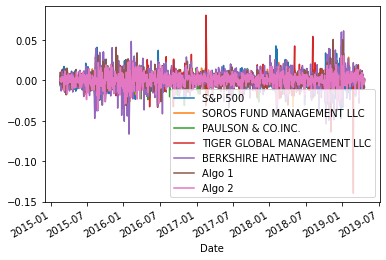

In [34]:
# Plot daily returns of all portfolios
total_returns.plot(kind = 'line')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Potfolio Returns'}, xlabel='Date'>

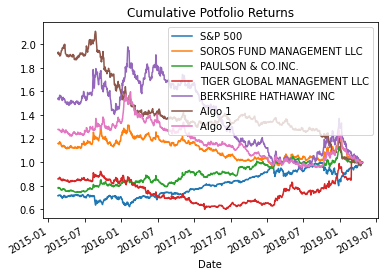

In [35]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + total_returns).cumprod()


# Plot cumulative returns
cumulative_returns.plot(title = 'Cumulative Potfolio Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [36]:
total_returns.head()

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,-0.008764,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-18,-0.001011,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-17,-0.001577,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-16,0.002279,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572
2019-04-15,-0.000509,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504


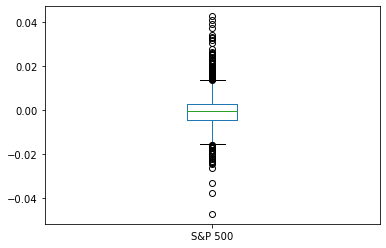

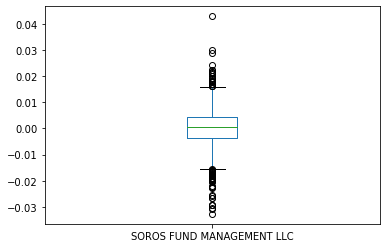

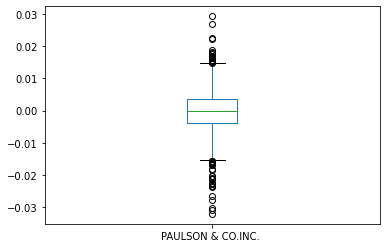

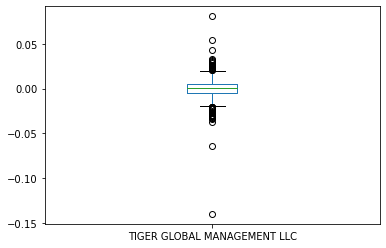

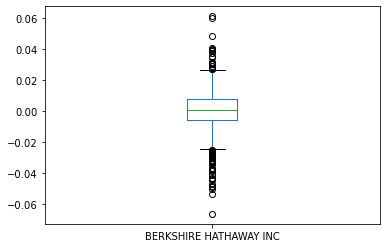

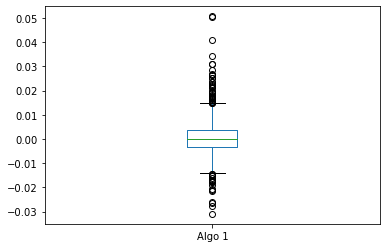

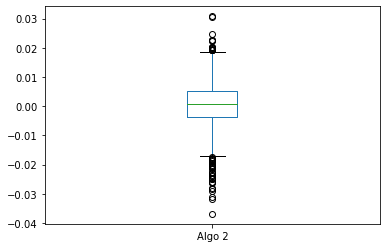

In [37]:
sp500_bp = total_returns[['S&P 500']].plot(kind = 'box')
soros_fund_bp = total_returns[['SOROS FUND MANAGEMENT LLC']].plot(kind = 'box')
paulson_co_bp = total_returns[['PAULSON & CO.INC. ']].plot(kind = 'box')
tiger_global_bp = total_returns[['TIGER GLOBAL MANAGEMENT LLC']].plot(kind = 'box')
berkshire_h_bp = total_returns[['BERKSHIRE HATHAWAY INC']].plot(kind = 'box')
algo_1_bp = total_returns[['Algo 1']].plot(kind = 'box')
algo_2_bp = total_returns[['Algo 2']].plot(kind = 'box')

In [38]:
# Box plot to visually show risk



### Calculate Standard Deviations

In [39]:
# Calculate the daily standard deviations of all portfolios
volatility = total_returns.std()
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.006992
Algo 1                         0.007609
SOROS FUND MANAGEMENT LLC      0.007862
Algo 2                         0.008309
S&P 500                        0.008556
TIGER GLOBAL MANAGEMENT LLC    0.010850
BERKSHIRE HATHAWAY INC         0.012863
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [40]:
# Calculate  the daily standard deviation of S&P 500
sp500_volatility = total_returns[['S&P 500']].std()
# Determine which portfolios are riskier than the S&P 500
print(volatility)

PAULSON & CO.INC.              0.006992
Algo 1                         0.007609
SOROS FUND MANAGEMENT LLC      0.007862
Algo 2                         0.008309
S&P 500                        0.008556
TIGER GLOBAL MANAGEMENT LLC    0.010850
BERKSHIRE HATHAWAY INC         0.012863
dtype: float64


In [41]:
volatility[5] and volatility[6] > volatility[4]

True

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized standard deviation (252 trading days)
volatility_annual = total_returns.std() * np.sqrt(252)
volatility_annual.sort_values(inplace=True)
volatility_annual

PAULSON & CO.INC.              0.110993
Algo 1                         0.120788
SOROS FUND MANAGEMENT LLC      0.124803
Algo 2                         0.131901
S&P 500                        0.135828
TIGER GLOBAL MANAGEMENT LLC    0.172238
BERKSHIRE HATHAWAY INC         0.204198
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
total_returns_rolling = total_returns.rolling(window=21).std()

total_returns_rolling.head(30)

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

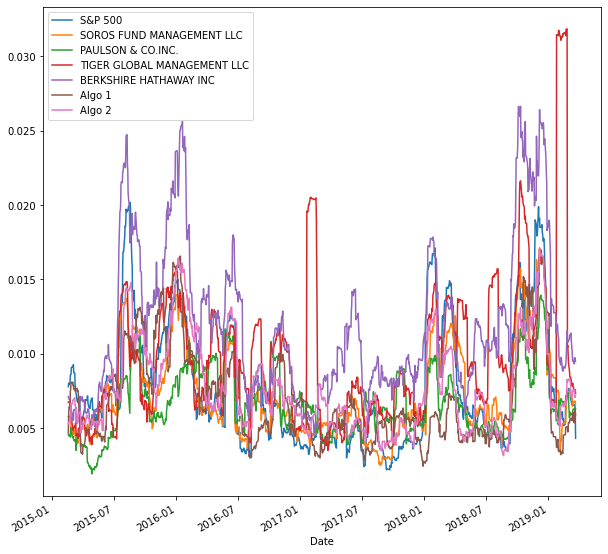

In [44]:
# Plot the rolling standard deviation

total_returns_rolling.plot(figsize=(10,10))

### Calculate and plot the correlation

In [45]:
# Calculate the correlation
correlation = total_returns.corr()

correlation


,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
S&P 500,1.000000,-0.029444,-0.009059,-0.017816,-0.038557,-0.030746,0.008114
SOROS FUND MANAGEMENT LLC,-0.029444,1.000000,0.699858,0.560989,0.754167,0.113415,0.339765
PAULSON & CO.INC.,-0.009059,0.699858,1.000000,0.434227,0.545588,0.128508,0.295300
TIGER GLOBAL MANAGEMENT LLC,-0.017816,0.560989,0.434227,1.000000,0.424105,0.027248,0.180820
BERKSHIRE HATHAWAY INC,-0.038557,0.754167,0.545588,0.424105,1.000000,0.102645,0.318025
Algo 1,-0.030746,0.113415,0.128508,0.027248,0.102645,1.000000,0.285898
Algo 2,0.008114,0.339765,0.295300,0.180820,0.318025,0.285898,1.000000


<AxesSubplot:>

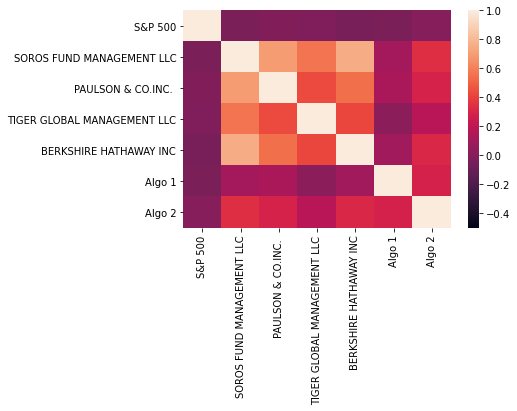

In [46]:
# Display the correlation matrix
sns.heatmap(correlation, vmin = -0.5, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [47]:
# Calculate covariance of a single portfolio
berkshire_h_cov = total_returns['BERKSHIRE HATHAWAY INC'].cov(total_returns['S&P 500'])
print('Berkshire Hathaway Inc Covariance:', berkshire_h_cov)

# Calculate variance of S&P 500
sp500_var = total_returns['S&P 500'].var()
print('S&P 500 Variance:', sp500_var)

# Computing beta
berkshire_h_beta = berkshire_h_cov / sp500_var
print('Berkshire Hathaway Beta:', berkshire_h_beta)

# Plot beta trend


Berkshire Hathaway Inc Covariance: -4.243638252108142e-06
S&P 500 Variance: 7.321110149014315e-05
Berkshire Hathaway Beta: -0.05796440930040492


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [48]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Annualized Sharpe Ratios
total_sharpe_ratio = (total_returns.mean() * 252) / (volatility * np.sqrt(252))
total_sharpe_ratio

Algo 1                         1.361148
Algo 2                         0.512735
BERKSHIRE HATHAWAY INC         0.605419
PAULSON & CO.INC.             -0.473715
S&P 500                       -0.522671
SOROS FUND MANAGEMENT LLC      0.346411
TIGER GLOBAL MANAGEMENT LLC   -0.124567
dtype: float64

<AxesSubplot:>

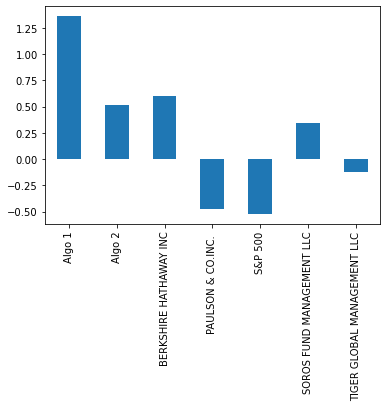

In [50]:
# Visualize the sharpe ratios as a bar plot
total_sharpe_ratio.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Based on the amount of risk each portfolio has taken, Algorithm 1 has outperformed the S&P 500 and the whales portfolios by a land slide. When compared to the rest of the subject portfolios and S&P 500, Algortithm 2 also performs very well. Ultimately, Algorithm 1 heavily outperforms the S&P 500 and the whales portfolios and Algorithm 2 slightly outperforms (Berkshire Hathaway had bette results).

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [51]:
# Reading data from 1st stock
goog_prices = pd.read_csv('goog_historical.csv', index_col = "Trade DATE", parse_dates = True, infer_datetime_format=True)

goog_prices.head(10)


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
2019-05-02,GOOG,1162.61
2019-05-01,GOOG,1168.08
2019-04-30,GOOG,1188.48
2019-04-29,GOOG,1287.58


In [52]:
columns = ['Symbol', 'GOOG']

goog_prices.columns = columns

goog_prices.head()

,Symbol,GOOG
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [53]:
# Reading data from 2nd stock
aapl_prices = pd.read_csv('aapl_historical.csv', index_col = "Trade DATE", parse_dates = True, infer_datetime_format=True)

aapl_prices.head(10)



,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
2019-05-02,AAPL,209.15
2019-05-01,AAPL,210.52
2019-04-30,AAPL,200.67
2019-04-29,AAPL,204.61


In [54]:
columns = ['Symbol', 'AAPL']

aapl_prices.columns = columns

aapl_prices.head()

,Symbol,AAPL
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [55]:
# Reading data from 3rd stock

costco_prices = pd.read_csv('cost_historical.csv', index_col = "Trade DATE", parse_dates = True, infer_datetime_format=True)

costco_prices.head(10)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
2019-05-02,COST,242.69
2019-05-01,COST,241.59
2019-04-30,COST,245.53
2019-04-29,COST,244.28


In [56]:
columns = ['Symbol', 'COSTCO']

costco_prices.columns = columns

costco_prices.head()

,Symbol,COSTCO
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [57]:
# Combine all stocks in a single DataFrame
total_prices = pd.concat([goog_prices['GOOG'], aapl_prices['AAPL'], costco_prices['COSTCO']], axis = "columns", join = "inner")

total_prices.tail()


,GOOG,AAPL,COSTCO
Trade DATE,,,
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48
2018-05-14,1100.20,188.15,195.88
2018-05-11,1098.26,188.59,195.76


In [58]:
total_prices.count()

GOOG      250
AAPL      250
COSTCO    250
dtype: int64

In [59]:
# Reorganize portfolio data by having a column per symbol


In [60]:
# Calculate daily returns
total_portfolio_returns = total_prices.pct_change()

# Drop NAs
total_portfolio_returns.dropna(inplace=True)

# Display sample data
total_portfolio_returns.head(10)


,GOOG,AAPL,COSTCO
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890
2019-05-01,0.004705,0.006550,-0.004533
2019-04-30,0.017465,-0.046789,0.016309
2019-04-29,0.083384,0.019634,-0.005091
2019-04-26,-0.011960,-0.001515,-0.001883


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [77]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
weighted_portfolio_returns = total_portfolio_returns.dot(weights)


# Display sample data
weighted_portfolio_returns.head(10)


Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
2019-05-01    0.002241
2019-04-30   -0.004339
2019-04-29    0.032642
2019-04-26   -0.005120
2019-04-25    0.001745
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [70]:
# Join your returns DataFrame to the original returns DataFrame

combined_portfolio_returns = pd.concat([total_returns, weighted_portfolio_returns], axis = "columns", join = "inner")

combined_portfolio_returns.head()


,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,0
2019-04-22,-0.008764,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.011812
2019-04-18,-0.001011,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001148
2019-04-17,-0.001577,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-0.001541
2019-04-16,0.002279,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.009149
2019-04-15,-0.000509,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,-0.000326


In [80]:
combined_portfolio_returns.columns = ['S&P 500', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'Custom']

combined_portfolio_returns.head()


,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
2019-04-22,-0.008764,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.011812
2019-04-18,-0.001011,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001148
2019-04-17,-0.001577,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-0.001541
2019-04-16,0.002279,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.009149
2019-04-15,-0.000509,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,-0.000326


In [81]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns.count()


S&P 500                        237
SOROS FUND MANAGEMENT LLC      237
PAULSON & CO.INC.              237
TIGER GLOBAL MANAGEMENT LLC    237
BERKSHIRE HATHAWAY INC         237
Algo 1                         237
Algo 2                         237
Custom                         237
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [91]:
combined_portfolio_std = combined_portfolio_returns.std()

In [82]:
# Calculate the annualized `std`
combined_annual_std = combined_portfolio_returns.std() * np.sqrt(252)

combined_annual_std

S&P 500                        0.152147
SOROS FUND MANAGEMENT LLC      0.146888
PAULSON & CO.INC.              0.116908
TIGER GLOBAL MANAGEMENT LLC    0.232672
BERKSHIRE HATHAWAY INC         0.246849
Algo 1                         0.133773
Algo 2                         0.139197
Custom                         0.213137
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

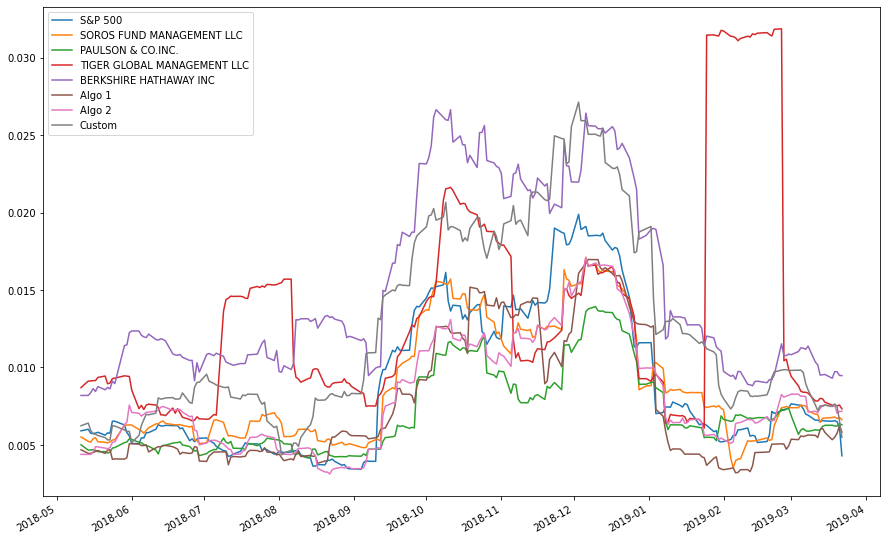

In [83]:
# Calculate rolling standard deviation
combined_portfolio_rolling = combined_portfolio_returns.rolling(window=21).std()

combined_portfolio_rolling.head(30)


# Plot rolling standard deviation
combined_portfolio_rolling.plot(figsize = (15,10))


### Calculate and plot the correlation

In [84]:
# Calculate and plot the correlation
total_correlation = combined_portfolio_returns.corr()

total_correlation



,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
S&P 500,1.000000,-0.131407,-0.093588,-0.087516,-0.075516,-0.118845,-0.144271,0.869976
SOROS FUND MANAGEMENT LLC,-0.131407,1.000000,0.792647,0.478368,0.815424,0.338753,0.860702,-0.034935
PAULSON & CO.INC.,-0.093588,0.792647,1.000000,0.486938,0.649959,0.363405,0.782399,-0.014042
TIGER GLOBAL MANAGEMENT LLC,-0.087516,0.478368,0.486938,1.000000,0.324267,0.115360,0.408310,-0.031446
BERKSHIRE HATHAWAY INC,-0.075516,0.815424,0.649959,0.324267,1.000000,0.326377,0.781940,0.030848
Algo 1,-0.118845,0.338753,0.363405,0.115360,0.326377,1.000000,0.364533,0.013572
Algo 2,-0.144271,0.860702,0.782399,0.408310,0.781940,0.364533,1.000000,-0.041687
Custom,0.869976,-0.034935,-0.014042,-0.031446,0.030848,0.013572,-0.041687,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

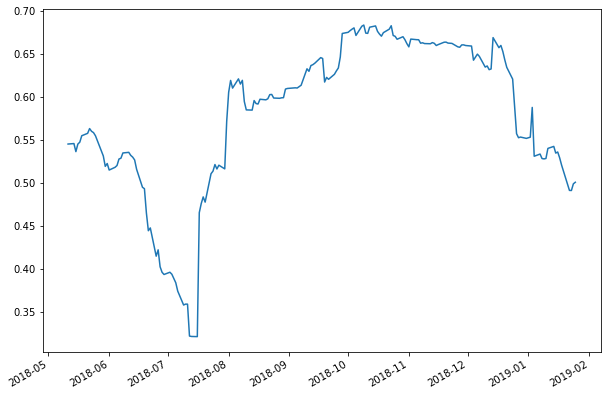

In [90]:
# Calculate and plot Beta
custom_rolling_cov = combined_portfolio_returns['Custom'].rolling(window=60).cov(combined_portfolio_returns['S&P 500'].rolling(window=60))

custom_rolling_var = combined_portfolio_returns['Custom'].rolling(window = 60).var()

custom_rolling_beta = custom_rolling_cov / custom_rolling_var

custom_rolling_beta.plot(figsize = (10,7))


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Calculate Annualzied Sharpe Ratios
annual_sharpe_ratio = (combined_portfolio_returns.mean() * 252) / (combined_portfolio_std * np.sqrt(252))

annual_sharpe_ratio


S&P 500                       -0.432942
SOROS FUND MANAGEMENT LLC      0.433161
PAULSON & CO.INC.              0.396877
TIGER GLOBAL MANAGEMENT LLC   -0.990695
BERKSHIRE HATHAWAY INC         0.106929
Algo 1                         2.046265
Algo 2                         0.035360
Custom                        -0.613547
dtype: float64

<AxesSubplot:>

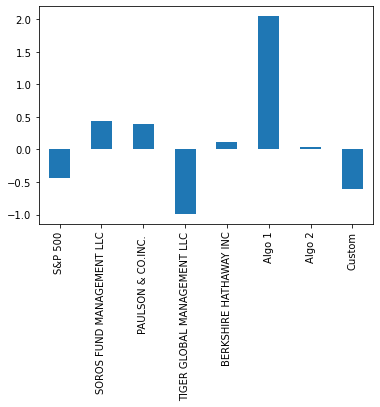

In [94]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratio.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!